In [267]:
import zipfile
import os

zip_path = r"C:\Users\orynb\.kaggle\food-delivery-dataset.zip"

extract_path = r"C:\Users\orynb\.kaggle\food_delivery_data"

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Датасет распакован в:", extract_path)

Датасет распакован в: C:\Users\orynb\.kaggle\food_delivery_data


In [268]:
import pandas as pd

In [269]:
file_path = r"C:\Users\orynb\.kaggle\food_delivery_data\train.csv"

In [270]:
df = pd.read_csv(file_path)

In [271]:
df.info()
df.head()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,1.023359
std,8.185109,22.883647,7.335122,21.118812,0.839065
min,-30.905562,-88.366217,0.010000,0.010000,0.000000
25%,12.933284,73.170000,12.988453,73.280000,0.000000
50%,18.546947,75.898497,18.633934,76.002574,1.000000
75%,22.728163,78.044095,22.785049,78.107044,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


In [272]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [273]:
df['Delivery_person_Age'] = pd.to_numeric(df['Delivery_person_Age'], errors='coerce')

In [274]:
df['Delivery_person_Ratings'] = pd.to_numeric(df['Delivery_person_Ratings'], errors='coerce')

In [276]:
df['Time_taken(min)'] = df['Time_taken(min)'].str.extract(r'(\d+)')

In [277]:
df['Time_taken(min)'] = pd.to_numeric(df['Time_taken(min)'], errors='coerce')

In [278]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

C:\Users\orynb\AppData\Local\Temp\ipykernel_15720\356155431.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')


In [279]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True, errors='coerce')

In [280]:
df['Delivery_person_Ratings'] = (
    df['Delivery_person_Ratings']
    .astype(str)           
    .str.replace(' ', '') 
)

df['Delivery_person_Ratings'] = pd.to_numeric(df['Delivery_person_Ratings'], errors='coerce')

In [281]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                       0
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                          0
City                              0
Time_taken(min)                   0
dtype: int64

In [282]:
df.duplicated().sum() 

np.int64(0)

In [283]:
import numpy as np

In [284]:
df['Weatherconditions'] = df['Weatherconditions'].str.replace('conditions NaN', '').str.strip()

In [285]:
df['Road_traffic_density'] = df['Road_traffic_density'].str.lower().str.strip()

In [286]:
df.duplicated().sum()

np.int64(0)

In [288]:
import matplotlib.pyplot as plt
import seaborn as sns

In [290]:
df['Order_hour'] = pd.to_datetime(df['Time_Orderd']).dt.hour

C:\Users\orynb\AppData\Local\Temp\ipykernel_15720\2097836284.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order_hour'] = pd.to_datetime(df['Time_Orderd']).dt.hour


In [291]:
df['Day_of_week'] = pd.to_datetime(df['Order_Date']).dt.day_name()

In [292]:
df['Weather_clean'] = df['Weatherconditions'].str.replace('conditions ', '')

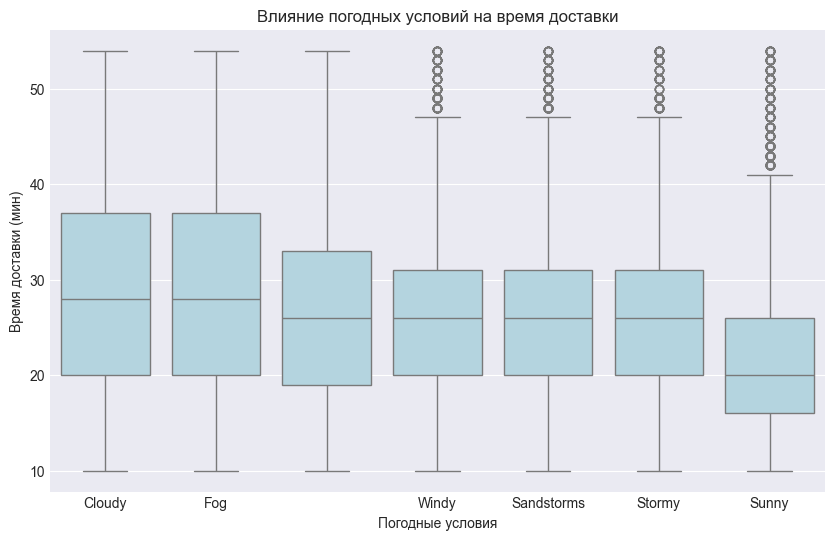

In [293]:
plt.figure(figsize=(10, 6))
weather_order = df.groupby('Weather_clean')['Time_taken(min)'].mean().sort_values(ascending=False).index
sns.boxplot(data=df, x='Weather_clean', y='Time_taken(min)', order=weather_order, color = 'lightblue')
plt.title('Влияние погодных условий на время доставки',)
plt.xlabel('Погодные условия')
plt.ylabel('Время доставки (мин)')
plt.show()

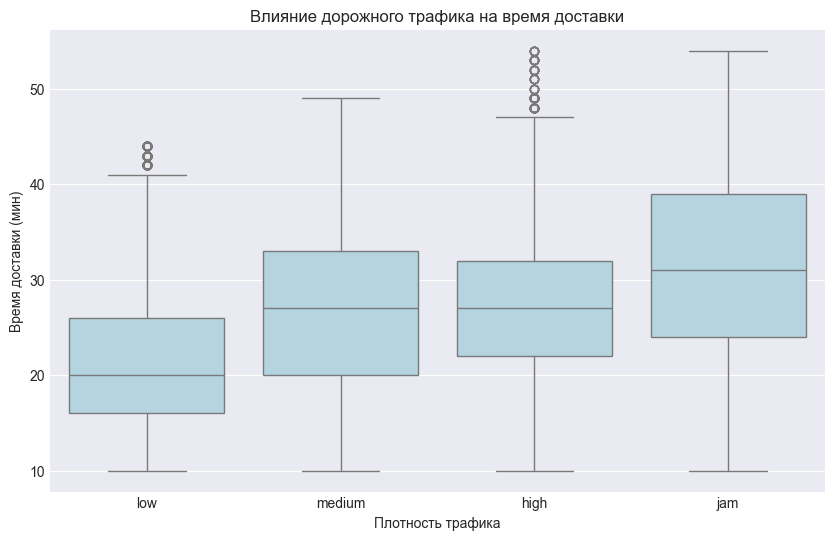

In [294]:
plt.figure(figsize=(10, 6))
traffic_order = ['low', 'medium', 'high', 'jam']
sns.boxplot(data=df, x='Road_traffic_density', y='Time_taken(min)', order=traffic_order, color = 'lightblue')
plt.title('Влияние дорожного трафика на время доставки',)
plt.xlabel('Плотность трафика',)
plt.ylabel('Время доставки (мин)',)
plt.show()

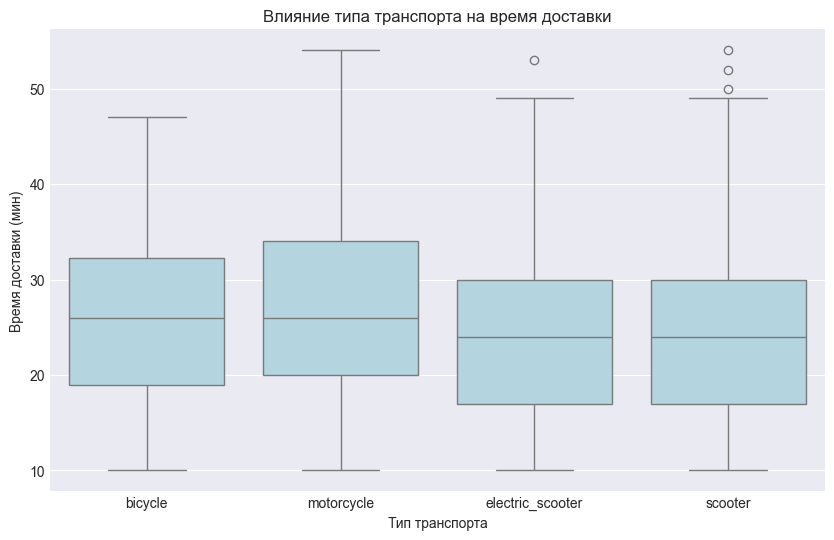

In [295]:
plt.figure(figsize=(10, 6))
vehicle_order = df.groupby('Type_of_vehicle')['Time_taken(min)'].median().sort_values(ascending=False).index
sns.boxplot(data=df, x='Type_of_vehicle', y='Time_taken(min)', order=vehicle_order, color = 'lightblue')
plt.title('Влияние типа транспорта на время доставки')
plt.xlabel('Тип транспорта')
plt.ylabel('Время доставки (мин)')
plt.show()

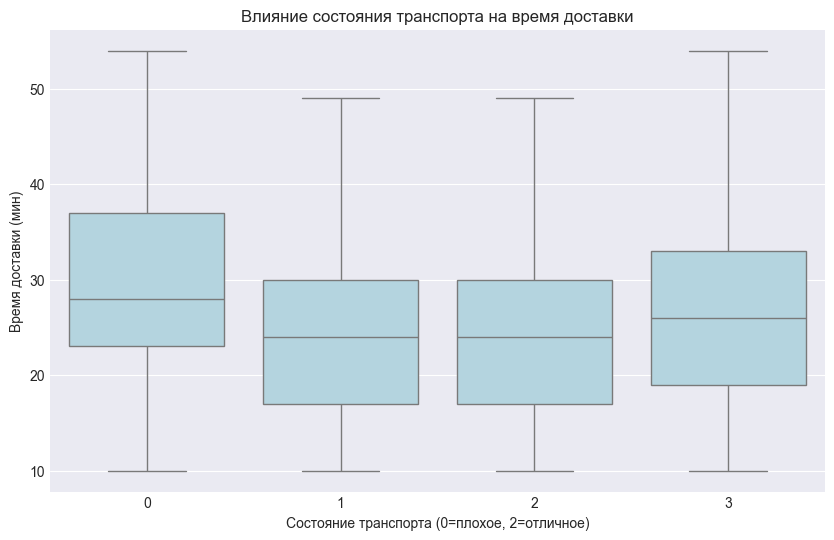

In [296]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Vehicle_condition', y='Time_taken(min)', color = 'lightblue')
plt.title('Влияние состояния транспорта на время доставки')
plt.xlabel('Состояние транспорта (0=плохое, 2=отличное)')
plt.ylabel('Время доставки (мин)')
plt.show()

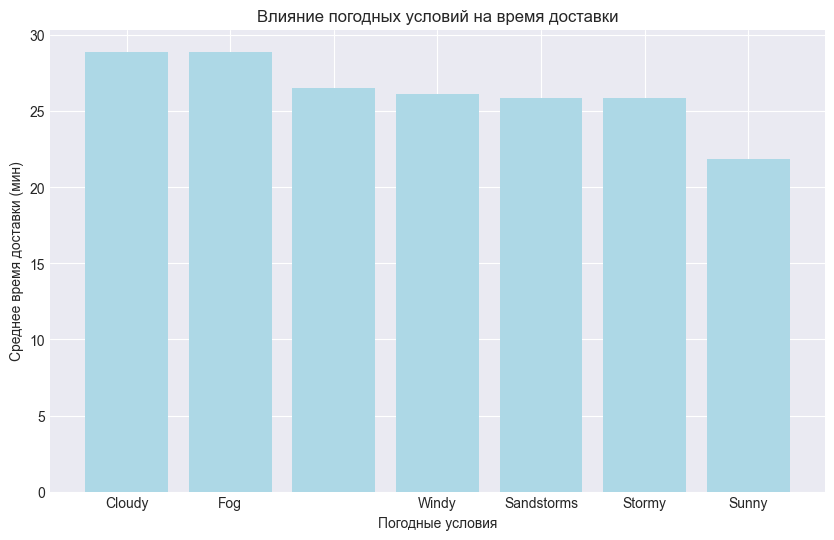

In [297]:
plt.figure(figsize=(10, 6))
weather_avg = df.groupby('Weather_clean')['Time_taken(min)'].mean().sort_values(ascending=False)
plt.bar(weather_avg.index, weather_avg.values, color = 'lightblue')
plt.title('Влияние погодных условий на время доставки')
plt.xlabel('Погодные условия')
plt.ylabel('Среднее время доставки (мин)')
plt.show()

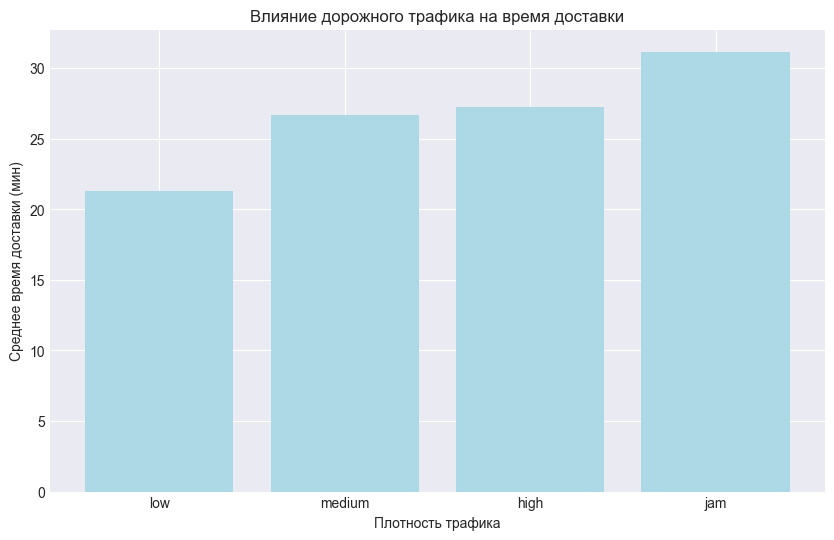

In [298]:
plt.figure(figsize=(10, 6))
traffic_order = ['low', 'medium', 'high', 'jam']
traffic_avg = df.groupby('Road_traffic_density')['Time_taken(min)'].mean()
traffic_avg = traffic_avg.reindex(traffic_order)
plt.bar(traffic_avg.index, traffic_avg.values, color = 'lightblue')
plt.title('Влияние дорожного трафика на время доставки',)
plt.xlabel('Плотность трафика')
plt.ylabel('Среднее время доставки (мин)')
plt.show() 

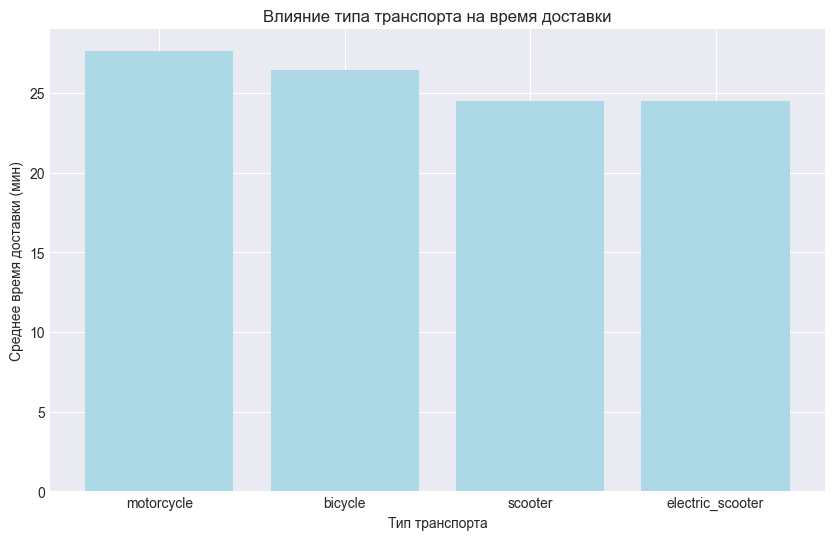

In [299]:
plt.figure(figsize=(10, 6))
vehicle_avg = df.groupby('Type_of_vehicle')['Time_taken(min)'].mean().sort_values(ascending=False)
plt.bar(vehicle_avg.index, vehicle_avg.values, color= 'lightblue')
plt.title('Влияние типа транспорта на время доставки')
plt.xlabel('Тип транспорта')
plt.ylabel('Среднее время доставки (мин)')
plt.show()

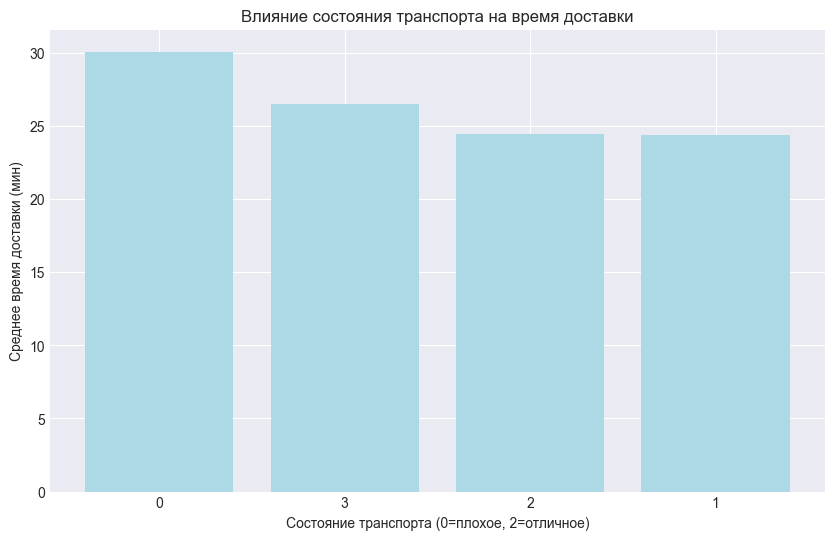

In [300]:
plt.figure(figsize=(10, 6))
condition_avg = df.groupby('Vehicle_condition')['Time_taken(min)'].mean().sort_values(ascending=False)
plt.bar(condition_avg.index.astype(str), condition_avg.values, color = 'lightblue')
plt.title('Влияние состояния транспорта на время доставки')
plt.xlabel('Состояние транспорта (0=плохое, 2=отличное)')
plt.ylabel('Среднее время доставки (мин)')
plt.show()

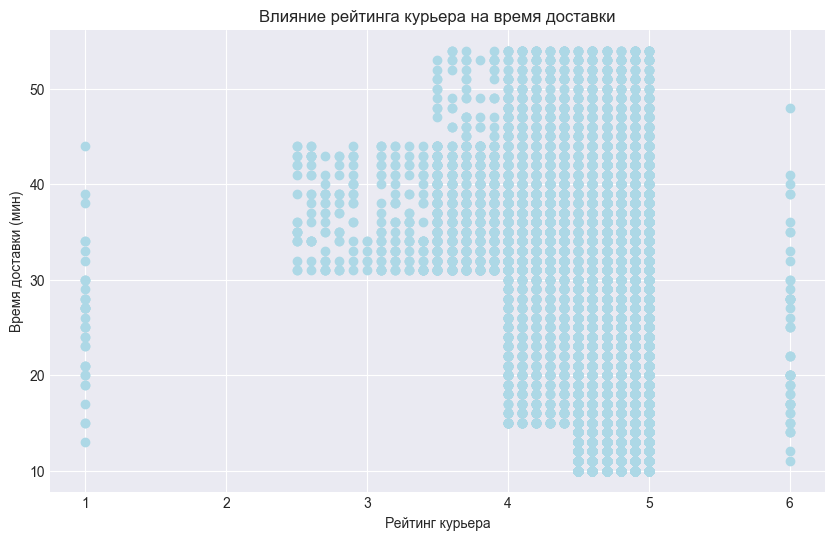

In [301]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Delivery_person_Ratings'], df['Time_taken(min)'],color='lightblue')
plt.xlabel('Рейтинг курьера')
plt.ylabel('Время доставки (мин)')
plt.title('Влияние рейтинга курьера на время доставки')
plt.show()

Text(0.5, 1.0, 'Влияние возраста курьера на время доставки')

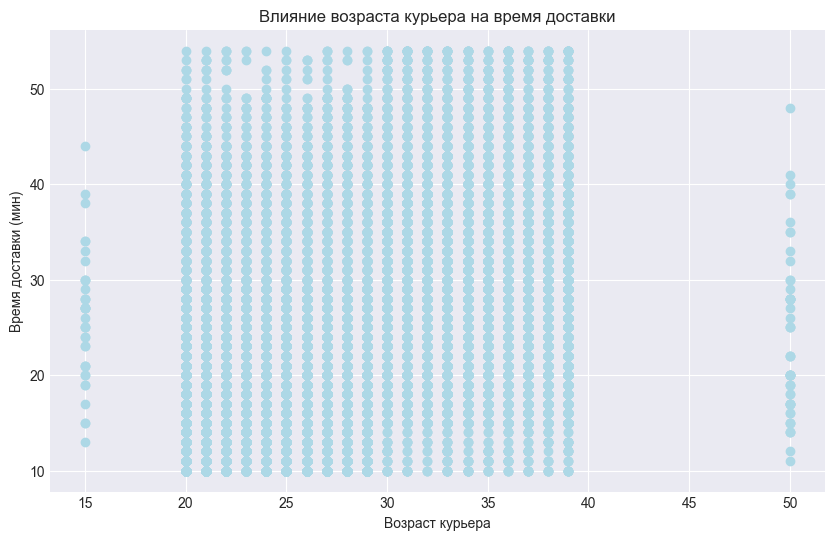

In [302]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Delivery_person_Age'], df['Time_taken(min)'], color='lightblue')
plt.xlabel('Возраст курьера')
plt.ylabel('Время доставки (мин)')
plt.title('Влияние возраста курьера на время доставки')

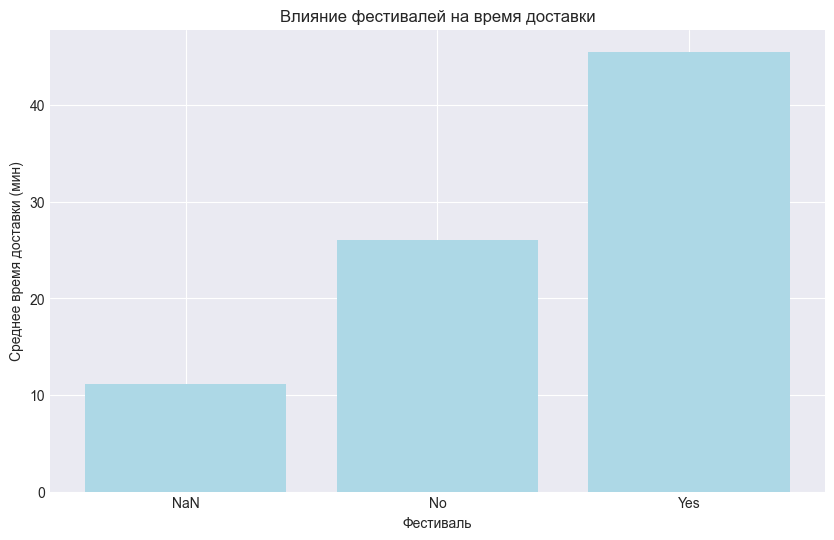

In [303]:
plt.figure(figsize=(10, 6))
festival_avg = df.groupby('Festival')['Time_taken(min)'].mean()
plt.bar(festival_avg.index, festival_avg.values, color= 'lightblue')
plt.title('Влияние фестивалей на время доставки')
plt.xlabel('Фестиваль')
plt.ylabel('Среднее время доставки (мин)')
plt.show()

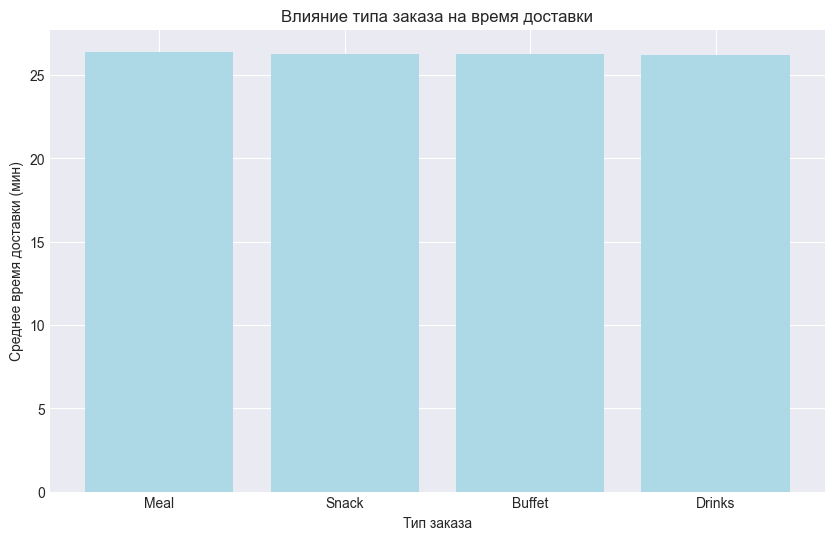

In [304]:
plt.figure(figsize=(10, 6))
order_avg = df.groupby('Type_of_order')['Time_taken(min)'].mean().sort_values(ascending=False)
plt.bar(order_avg.index, order_avg.values, color= 'lightblue')
plt.title('Влияние типа заказа на время доставки')
plt.xlabel('Тип заказа')
plt.ylabel('Среднее время доставки (мин)')
plt.show()